In [34]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [35]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [36]:
NUM_CLASSES = 6

# Dataset reading

In [37]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [38]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [41]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_4 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,136 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Model checkpoint callback
# cp_callback = tf.keras.callbacks.ModelCheckpoint(
#     model_save_path, verbose=1, save_weights_only=False)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    'model/keypoint_classifier/keypoint_classifier.keras',  # Change the extension to .keras
    verbose=1,
    save_weights_only=False
)

# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [43]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [44]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 4s 912ms/step - accuracy: 0.2266 - loss: 1.7976
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.2229 - loss: 1.8094 - val_accuracy: 0.2555 - val_loss: 1.7540
Epoch 2/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2422 - loss: 1.8109
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2491 - loss: 1.7882 - val_accuracy: 0.3304 - val_loss: 1.6917
Epoch 3/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2734 - loss: 1.7210
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2873 - loss: 1.7041 - val_accuracy: 0.3260 - val_loss: 1.6404
Epoch 4/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2891 - loss: 1.6835
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━

Epoch 25/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5469 - loss: 1.1160
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5242 - loss: 1.1632 - val_accuracy: 0.4934 - val_loss: 1.0500
Epoch 26/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5703 - loss: 1.0597
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5527 - loss: 1.1005 - val_accuracy: 0.4934 - val_loss: 1.0306
Epoch 27/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5703 - loss: 1.0165
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5548 - loss: 1.0932 - val_accuracy: 0.4934 - val_loss: 1.0120
Epoch 28/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4922 - loss: 1.1027
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━

Epoch 49/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7500 - loss: 0.8172
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7204 - loss: 0.8165 - val_accuracy: 0.8899 - val_loss: 0.6508
Epoch 50/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7031 - loss: 0.7658
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7123 - loss: 0.7849 - val_accuracy: 0.8855 - val_loss: 0.6382
Epoch 51/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6875 - loss: 0.8325
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7085 - loss: 0.7983 - val_accuracy: 0.8855 - val_loss: 0.6247
Epoch 52/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6797 - loss: 0.8627
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━

Epoch 73/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8203 - loss: 0.5281
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7968 - loss: 0.6018 - val_accuracy: 0.8899 - val_loss: 0.4148
Epoch 74/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7734 - loss: 0.6005
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7955 - loss: 0.6016 - val_accuracy: 0.8899 - val_loss: 0.4103
Epoch 75/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8828 - loss: 0.5605
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8300 - loss: 0.5922 - val_accuracy: 0.8987 - val_loss: 0.4006
Epoch 76/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8125 - loss: 0.5808
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━

Epoch 97/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8203 - loss: 0.5164
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8130 - loss: 0.5445 - val_accuracy: 0.9251 - val_loss: 0.3024
Epoch 98/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8047 - loss: 0.5639
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8284 - loss: 0.5169 - val_accuracy: 0.9295 - val_loss: 0.2995
Epoch 99/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8203 - loss: 0.5215
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8100 - loss: 0.5479 - val_accuracy: 0.9295 - val_loss: 0.2938
Epoch 100/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8594 - loss: 0.4335
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6

Epoch 121/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8594 - loss: 0.4086
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8373 - loss: 0.4571 - val_accuracy: 0.9515 - val_loss: 0.2424
Epoch 122/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8672 - loss: 0.4796
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8378 - loss: 0.4679 - val_accuracy: 0.9515 - val_loss: 0.2403
Epoch 123/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8750 - loss: 0.3862
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8554 - loss: 0.4542 - val_accuracy: 0.9515 - val_loss: 0.2377
Epoch 124/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8594 - loss: 0.4675
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.ker

Epoch 145/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8516 - loss: 0.3590
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8605 - loss: 0.4075 - val_accuracy: 0.9648 - val_loss: 0.2052
Epoch 146/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9062 - loss: 0.3751
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8669 - loss: 0.4402 - val_accuracy: 0.9648 - val_loss: 0.2040
Epoch 147/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8672 - loss: 0.3613
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8538 - loss: 0.4248 - val_accuracy: 0.9604 - val_loss: 0.2034
Epoch 148/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8125 - loss: 0.4796
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.ke

Epoch 169/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8281 - loss: 0.5121
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8524 - loss: 0.4363 - val_accuracy: 0.9692 - val_loss: 0.1891
Epoch 170/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8047 - loss: 0.4151
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8393 - loss: 0.4046 - val_accuracy: 0.9648 - val_loss: 0.1871
Epoch 171/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9062 - loss: 0.3384
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8674 - loss: 0.4137 - val_accuracy: 0.9692 - val_loss: 0.1847
Epoch 172/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8281 - loss: 0.4361
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.ker

Epoch 193/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8203 - loss: 0.4113
Epoch 193: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8409 - loss: 0.4105 - val_accuracy: 0.9692 - val_loss: 0.1667
Epoch 194/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8750 - loss: 0.3331
Epoch 194: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8719 - loss: 0.3599 - val_accuracy: 0.9692 - val_loss: 0.1660
Epoch 195/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8984 - loss: 0.4082
Epoch 195: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8776 - loss: 0.3915 - val_accuracy: 0.9692 - val_loss: 0.1649
Epoch 196/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8750 - loss: 0.3233
Epoch 196: saving model to model/keypoint_classifier/keypoint_classifier.ker

Epoch 217/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8594 - loss: 0.3971
Epoch 217: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8804 - loss: 0.3952 - val_accuracy: 0.9692 - val_loss: 0.1561
Epoch 218/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8906 - loss: 0.3613
Epoch 218: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8967 - loss: 0.3626 - val_accuracy: 0.9648 - val_loss: 0.1581
Epoch 219/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8672 - loss: 0.4912
Epoch 219: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8641 - loss: 0.4275 - val_accuracy: 0.9648 - val_loss: 0.1596
Epoch 220/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8906 - loss: 0.3077
Epoch 220: saving model to model/keypoint_classifier/keypoint_classifier.ker

Epoch 241/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9375 - loss: 0.2948
Epoch 241: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8880 - loss: 0.3381 - val_accuracy: 0.9736 - val_loss: 0.1457
Epoch 242/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8750 - loss: 0.3463
Epoch 242: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8755 - loss: 0.3791 - val_accuracy: 0.9736 - val_loss: 0.1434
Epoch 243/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8516 - loss: 0.4607
Epoch 243: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8758 - loss: 0.3897 - val_accuracy: 0.9736 - val_loss: 0.1432
Epoch 244/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8516 - loss: 0.3650
Epoch 244: saving model to model/keypoint_classifier/keypoint_classifier.ker

Epoch 265/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8438 - loss: 0.3874
Epoch 265: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8673 - loss: 0.3562 - val_accuracy: 0.9736 - val_loss: 0.1354
Epoch 266/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8750 - loss: 0.2919
Epoch 266: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8742 - loss: 0.3456 - val_accuracy: 0.9736 - val_loss: 0.1334
Epoch 267/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8359 - loss: 0.3773
Epoch 267: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8533 - loss: 0.3928 - val_accuracy: 0.9736 - val_loss: 0.1327
Epoch 268/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8828 - loss: 0.3198
Epoch 268: saving model to model/keypoint_classifier/keypoint_classifier.ker

Epoch 289/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8594 - loss: 0.3571
Epoch 289: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8684 - loss: 0.3599 - val_accuracy: 0.9736 - val_loss: 0.1306
Epoch 290/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8594 - loss: 0.3314
Epoch 290: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8715 - loss: 0.3365 - val_accuracy: 0.9736 - val_loss: 0.1293
Epoch 291/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8828 - loss: 0.3550
Epoch 291: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8973 - loss: 0.3150 - val_accuracy: 0.9736 - val_loss: 0.1265
Epoch 292/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9219 - loss: 0.2246
Epoch 292: saving model to model/keypoint_classifier/keypoint_classifier.ker

Epoch 313/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8594 - loss: 0.4379
Epoch 313: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8666 - loss: 0.4119 - val_accuracy: 0.9780 - val_loss: 0.1209
Epoch 314/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8594 - loss: 0.3803
Epoch 314: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8935 - loss: 0.3249 - val_accuracy: 0.9780 - val_loss: 0.1214
Epoch 315/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8906 - loss: 0.3110
Epoch 315: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8832 - loss: 0.3359 - val_accuracy: 0.9736 - val_loss: 0.1222
Epoch 316/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9141 - loss: 0.3336
Epoch 316: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [45]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9720 - loss: 0.1243 


In [46]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [47]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[0.7520297  0.24698539 0.00098489]
0


# Confusion matrix

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


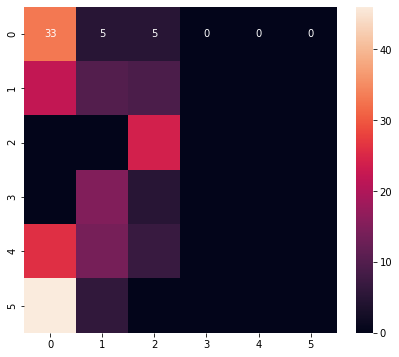

Classification Report
              precision    recall  f1-score   support

           0       0.26      0.77      0.39        43
           1       0.20      0.24      0.22        41
           2       0.48      1.00      0.65        24
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        47
           5       0.00      0.00      0.00        52

    accuracy                           0.30       227
   macro avg       0.16      0.34      0.21       227
weighted avg       0.14      0.30      0.18       227



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [49]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/18/5b6jr8v967q_s5mgjqqmq_kr0000gp/T/tmp2ob1v12d/assets


INFO:tensorflow:Assets written to: /var/folders/18/5b6jr8v967q_s5mgjqqmq_kr0000gp/T/tmp2ob1v12d/assets


# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))